# Monte Carlo Integration in 3D space

### Draw the finction $x^2 + y^2 + z^2$ in $3D$ space

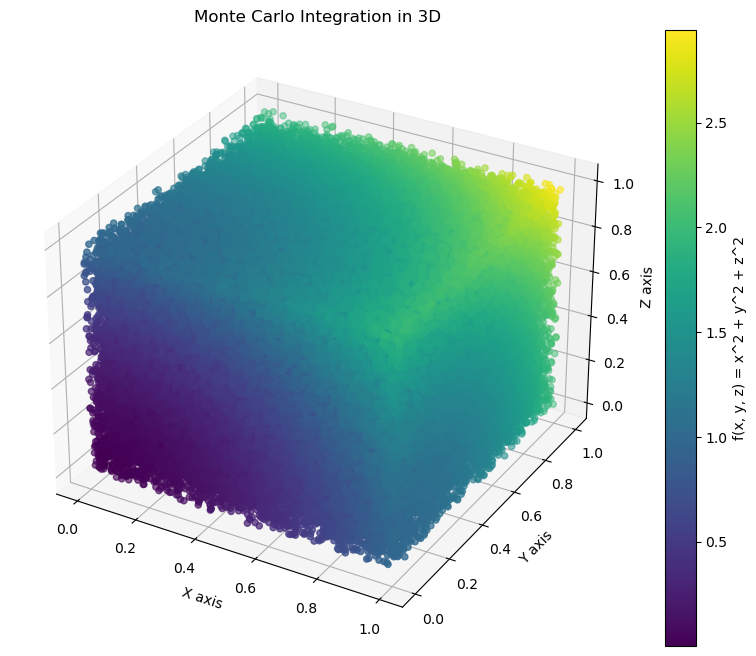

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

nRandomNumber = 100000

# Define the 3D integrand, f(x,y,z) = x^2 + y^2 + z^2
f = lambda x, y, z: x**2 + y**2 + z**2

# Generate random points and evaluate the function at these points
points = np.random.uniform(0, 1, (nRandomNumber, 3))
values = np.array([f(x, y, z) for x, y, z in points])

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color mapping
scatter = ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=values, cmap='viridis', marker='o')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Monte Carlo Integration in 3D')
plt.colorbar(scatter, ax=ax, label='f(x, y, z) = x^2 + y^2 + z^2')
plt.show()

### Implimenting the MC method with a fix sample size

In [46]:
import numpy as np

nRandomNumber = 10000

f = lambda x, y, z: x**2 + y**2 + z**2

# Define the ranges for x, y, and z
a, b = 0, 1  # Range for x
c, d = 0, 1  # Range for y
e, g = 0, 1  # Range for z

result = 0

for j in range(nRandomNumber):
    x = np.random.random()  # Random number in [0,1] for x
    y = np.random.random()  # Random number in [0,1] for y
    z = np.random.random()  # Random number in [0,1] for z
    
    result += f(x, y, z) * (b - a) * (d - c) * (g - e) / nRandomNumber

print("Number of random numbers:", nRandomNumber, " Result:", result)

Number of random numbers: 10000  Result: 0.9952810478573726


### Find the MC values and errors with different sample sizes($N$)

In [65]:
import numpy as np

# Define the integrand function
f = lambda x, y, z: x**2 + y**2 + z**2

nRandomNumber_list = np.array([100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000])

exact_value = 1  # exact result for the integration

result = np.zeros(len(nRandomNumber_list))  # to store MC results
errors = np.zeros(len(nRandomNumber_list))   # to store errors

# ======= loop over nRandomNumber ==========
for k, nRand in enumerate(nRandomNumber_list):
    
    # ======= perform MC sampling =======
    mc_sum = 0
    
    for j in range(nRand):        
        x = np.random.random()  
        y = np.random.random()  
        z = np.random.random()  
        mc_sum += f(x, y, z)
    
    mc_average = mc_sum / nRand
    result[k] = mc_average
    errors[k] = mc_average - exact_value
    
    print("Number of random numbers:", nRand, " MC result: ", result[k], ' error:', errors[k])

Number of random numbers: 100  MC result:  1.1633602272243446  error: 0.16336022722434462
Number of random numbers: 200  MC result:  0.9599934479695184  error: -0.040006552030481646
Number of random numbers: 500  MC result:  0.9866049898882107  error: -0.01339501011178934
Number of random numbers: 1000  MC result:  1.0133845357328677  error: 0.013384535732867686
Number of random numbers: 2000  MC result:  0.9876679541444229  error: -0.012332045855577123
Number of random numbers: 5000  MC result:  1.000919242492804  error: 0.0009192424928039511
Number of random numbers: 10000  MC result:  1.0015861045317576  error: 0.0015861045317575595
Number of random numbers: 20000  MC result:  0.9904473083910056  error: -0.009552691608994412
Number of random numbers: 50000  MC result:  1.0039639256151185  error: 0.003963925615118491
Number of random numbers: 100000  MC result:  0.9994413193778893  error: -0.0005586806221107299


### Plotting MC values with $N$

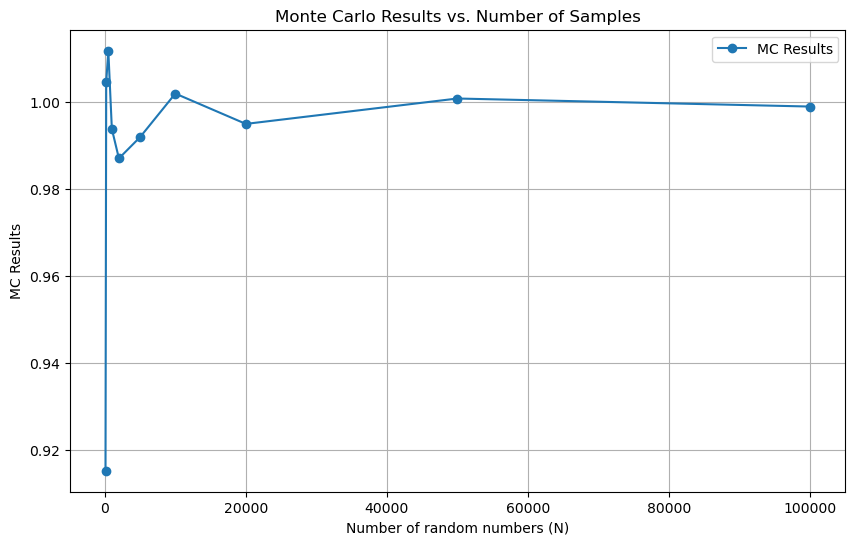

In [66]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x, y, z: x**2 + y**2 + z**2

nRandomNumber_list = np.array([100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000])
exact_value = 1 
result = np.zeros(len(nRandomNumber_list))    

for k, nRand in enumerate(nRandomNumber_list):
    mc_sum = 0
    for j in range(nRand):        
        x = np.random.random()  
        y = np.random.random()  
        z = np.random.random()  
        mc_sum += f(x, y, z)
    mc_average = mc_sum / nRand
    result[k] = mc_average

plt.figure(figsize=(10, 6))
plt.plot(nRandomNumber_list, result, '-o', label='MC Results')
plt.xlabel('Number of random numbers (N)')
plt.ylabel('MC Results')
plt.title('Monte Carlo Results vs. Number of Samples')
plt.grid(True)
plt.legend()
plt.show()

### Error vs $N$

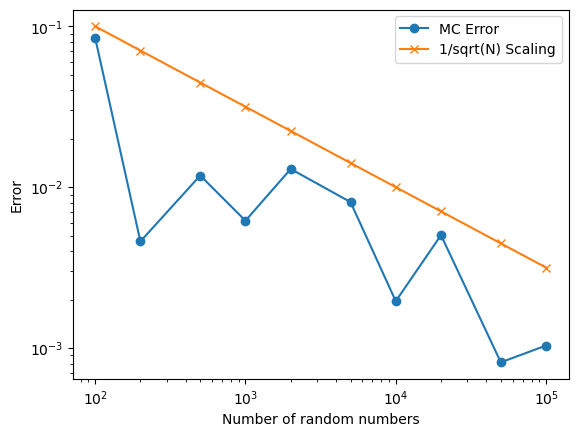

In [67]:
import numpy as np
import matplotlib.pyplot as plt

exact_value = 1

errors = np.abs(result - exact_value)

f1 = lambda x: 1/np.sqrt(x)

plt.plot(nRandomNumber_list, errors, '-o', label='MC Error')
plt.plot(nRandomNumber_list, f1(nRandomNumber_list), '-x', label='1/sqrt(N) Scaling')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Error')
plt.xlabel('Number of random numbers')
plt.legend()
plt.show()